In [20]:
# working directory
path = "D:/Jet2_Travel_Technologies/"

import os
os.chdir(path)
os.getcwd()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'D:/Jet2_Travel_Technologies/'

In [ ]:
# reading data set
import pandas as pd

data =  pd.read_csv("Usecase3_Dataset.csv")
print(data.shape, data.columns)
data.head(2)

In [ ]:
#basic info
data.info()

In [ ]:
#check for null values
data.isna().sum()

In [ ]:
#removing duplicates.
print(data.shape)
initial_row_no = data.shape[0]
data.drop_duplicates(inplace = True)
print(data.shape)
print("Number of duplicates: ", initial_row_no- data.shape[0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data.airline,hue=data.airline_sentiment,palette=['blue','green','red'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()+130), ha='center', va='top', color='black', size=10)

plt.show()

In [ ]:
data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

United airlines has got hightest feedback intotal in whch negative contribute majorily while Virgin America has got lowest feedback but thee feedback sentiment is proportionate.
All airline have negative feedback most.

In [ ]:
#calculation of positive feedback count to negative feedback ratio
data_grp= data.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
data_grp['positive']/data_grp['negative']

Since Delta has highest ratio, we can say it is performing better than the rest of airlines.

In [ ]:
#analyzing text column
import string
import re
#Converting Description into lowercase for homogeneity
def change_case(col1):
    lower_sentences = []
    for d in col1:
        lower_sentences.append(d.lower())
        col1  = pd.Series(lower_sentences)
    return col1

def only_words(text):
    final_list = []
    if isinstance(text, str): 
        word_list = text.split()
        for word in word_list:
            if isinstance(word, str):
                final_list.append(word)            
        return " ".join(final_list)
    else:
        return ""


#Making description have only alphabets
def make_alpha(col1):
    #remove special characters and numbers
    col1=col1.str.replace('[{}]'.format(string.punctuation), ' ')
    col1 = col1.str.replace('\d+', ' ')
    col1=col1.str.replace('\n',' ')
    col1=col1.str.replace('"',' ')
    col1=col1.str.replace('\r',' ')
    col1=col1.str.replace('\t',' ')
    #remove single length word
    col1=col1.str.replace(r'\b\w\b',' ')
    #remove multiple spaces
    col1 = col1.replace(r'\s+', ' ', regex=True)
    return pd.Series(col1)
   
#If user wants to remove specific word/s, 
#he can put here in the l1, variable 
def remove_words(list1,col1):
    pat = r'\b(?:{})\b'.format('|'.join(list1))
    col1= col1.str.replace(pat, '')
    return pd.Series(col1)

#display frequency of each word
def word_freq(col1):
    pd.options.display.max_rows = 40000
    print(col1.str.split(expand=True).stack().value_counts())

In [ ]:
#all to lower case
data['text1']=change_case(data['text'])
        
#remvoing numbers, special characters, extra spaces
data['text1']=make_alpha(data['text1'])
        
#see word frequency to remove words
word_freq(data['text1'])

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS

for i in ['co', "http", 'flight','flights', 'united','usairways','americanair','southwestair', 'jetblue', 'virginamerica',
         'sfo','lax','“',"aa","ve","dfw"]:
    STOP_WORDS.add(i)

data['text1'] = remove_words(STOP_WORDS, data['text1'])

#see word frequency to remove words
word_freq(data['text1'])

cancelled                                   1037
thanks                                      1028
service                                      947
help                                         856
time                                         769
customer                                     738
hours                                        670
amp                                          668
hold                                         634
plane                                        624
thank                                        574
need                                         542
delayed                                      534
gate                                         512
flightled                                    494
bag                                          485
hour                                         475
got                                          453
don                                          450
today                                        425
phone               

dtype: int64


In [22]:
data['clean_text'] = data['text1'].apply(lambda x : only_words(x))

In [23]:
from collections import Counter
def top20words(a):
    INFO_clean = [text for text in data[data['airline'] == a]['clean_text']]
    INFO_clean = ' '.join(INFO_clean).split()

    INFO_counts = Counter(INFO_clean)

    INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
    INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]

    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=INFO_common_words, y=INFO_common_counts)
    plt.title('Most Common Words used in the description for [%s]' % a)
    plt.show()

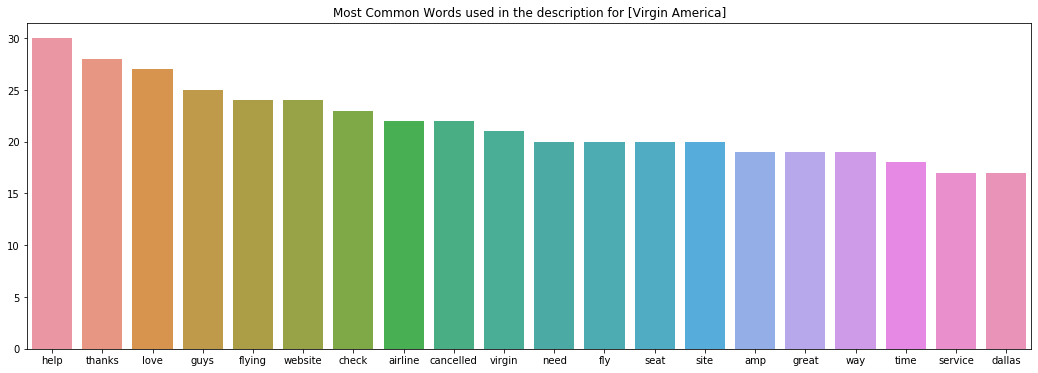

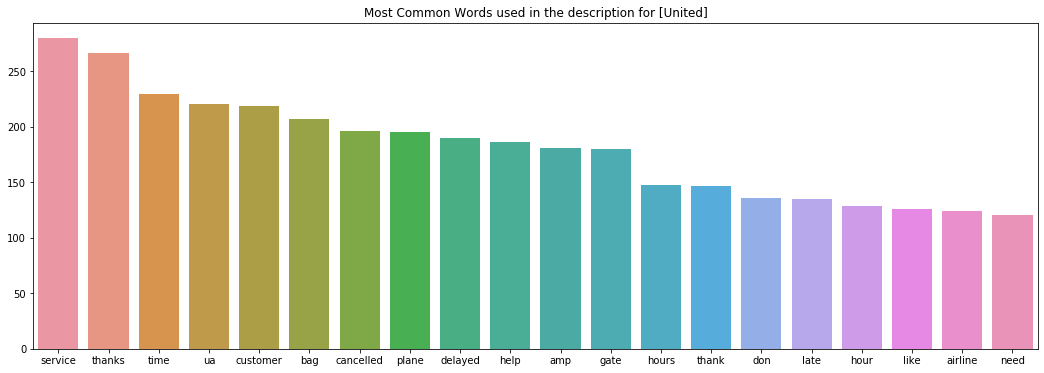

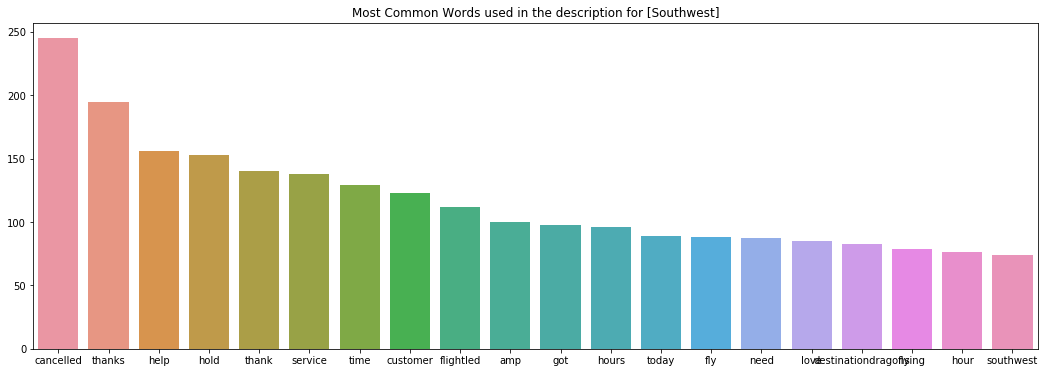

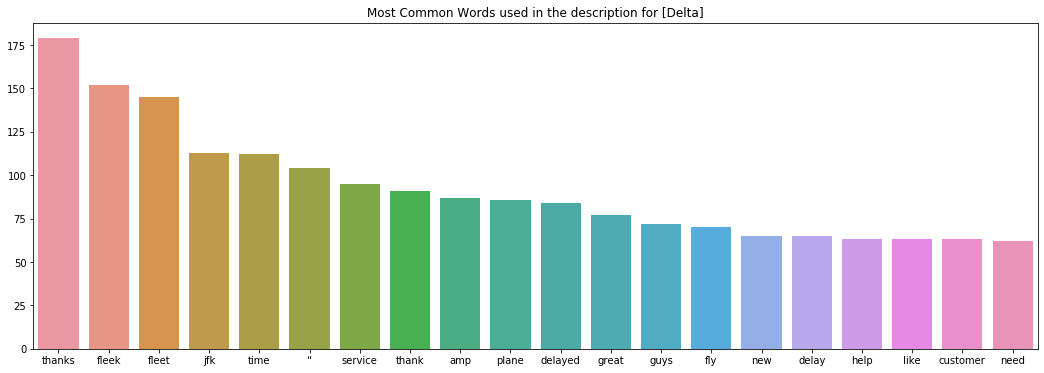

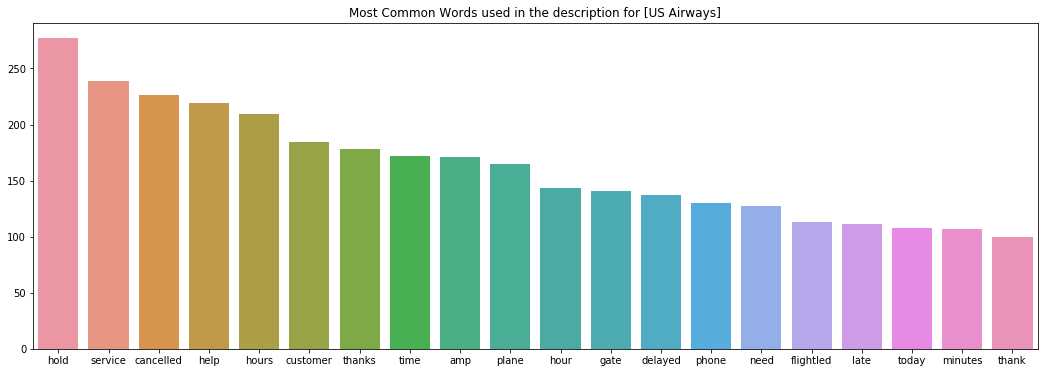

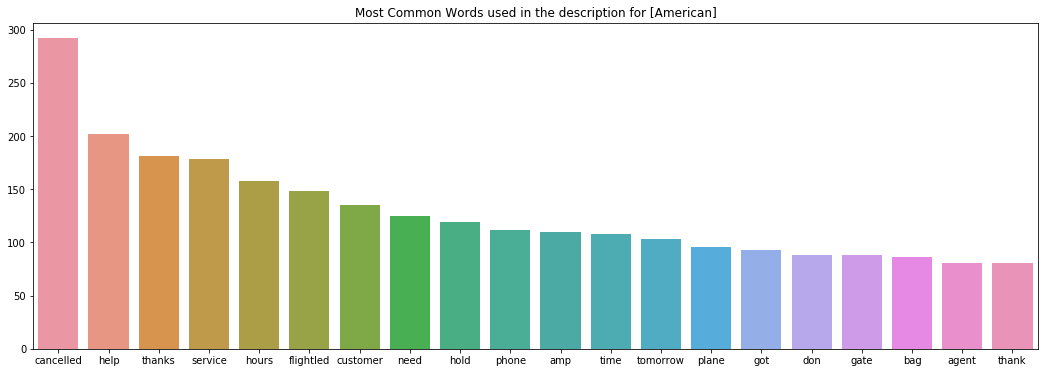

In [24]:
for x in data['airline'].unique():
    top20words(x)

In [25]:
for x in data['airline'].unique():
    data1 = data[data['airline']==x]
    negative_response = data1[data1['airline_sentiment']== "negative"]
    reason = negative_response[['airline','clean_text']]
    from nltk import ngrams
    vals = [y for x in reason['clean_text'] for y in x.split()]

    n = [3,4,5]
    a = pd.Series([y for x in n for y in ngrams(vals, x)]).value_counts()
    print("Top 5 negative comment pharses for airline ", x)
    print(a[0:5])

Top 5 negative comment pharses for airline  Virgin America
(like, customer, service)     2
(section, website, broken)    2
(elevate, account, help)      2
(late, bag, check)            2
(website, safari, iphone)     2
dtype: int64
Top 5 negative comment pharses for airline  United
(reflight, booking, problems)      10
(hours, late, flightr)              8
(lt, lt, lt)                        5
(customer, service, experience)     4
(worst, customer, service)          4
dtype: int64
Top 5 negative comment pharses for airline  Southwest
(worst, customer, service)        5
(rebook, cancelled, flightled)    5
(cancelled, flightled, help)      4
(love, dragonss, lauren)          4
(reflight, booking, problems)     4
dtype: int64
Top 5 negative comment pharses for airline  Delta
(“, fleet, fleek)                               21
(rt, fleet, fleek)                              12
(appease, passengers, wall, street)              6
(battles, appease, passengers, wall, street)     6
(battles, app

In [26]:
### COUNT VECTORIZER: CountVectorizer is used to count the number of times a word occurs
from sklearn.feature_extraction.text import CountVectorizer
X=data.clean_text
y=data.airline_sentiment
vect = CountVectorizer(min_df =4,ngram_range = (1,2))
vect.fit(X)
X_vectorized=vect.transform(X)

In [27]:
# label encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(data.airline_sentiment)
y = le.transform(data.airline_sentiment)

#y = LabelEncoder().fit_transform(y)

In [28]:
# transform the dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
x_res, y_res=oversample.fit_resample(X_vectorized,y)

In [29]:
print(len(y_res))

27261


In [30]:
print(x_res.shape)

(27261, 4847)


In [31]:
from sklearn.model_selection import train_test_split
## Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res,train_size=0.7, random_state=1,stratify=y_res)    

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import pandas as pd
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


#selection of best classifiers
dt = DecisionTreeClassifier(random_state=99)
xg = XGBClassifier(random_state=76)
nb = MultinomialNB()
sgd = SGDClassifier(random_state=45)
neun = MLPClassifier( random_state=789)
rfcl = RandomForestClassifier(random_state=43543)
bgcl = BaggingClassifier(n_estimators=30,random_state=4)
enclf = VotingClassifier(estimators = [('xgb', xg), ('nb', nb), ('nn', neun),('rf', rfcl), ('bg', bgcl)], voting = 'soft')

clfs = [dt,xg,nb,sgd,neun,rfcl,bgcl,enclf]
labels = ['DecisionTree','Xgboost','NaiveBayes','SGD','NeuralNetwork',
          'RandomForest','Bagging','Ensemble']
max_clf = dt
max_as = 0
max_fs = 0

for clf, label in zip(clfs, labels):
    
    a_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    r_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro')
    p_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro')
    f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    
    if((max_as<= a_scores.mean()) and (max_fs<=f1_scores.mean())):
        max_as=a_scores.mean()
        max_fs=f1_scores.mean()
        max_clf=clf
    
    
    print("Accuracy: %0.02f (+/- %0.2f), Recall: %0.02f, Precision: %0.02f, F1-score: %0.02f [%s]" % (a_scores.mean(), 
    a_scores.std(),r_scores.mean(), p_scores.mean(), f1_scores.mean(), label ))

max_clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('f1 score: ',f1_score(y_test, predictions, average="macro"))
print('precision score: ',precision_score(y_test, predictions, average="macro"))
print('recall score: ',recall_score(y_test,predictions, average="macro"))

Accuracy: 0.75 (+/- 0.01), Recall: 0.75, Precision: 0.74, F1-score: 0.74 [DecisionTree]
Accuracy: 0.43 (+/- 0.01), Recall: 0.43, Precision: 0.45, F1-score: 0.40 [Xgboost]
Accuracy: 0.54 (+/- 0.01), Recall: 0.54, Precision: 0.54, F1-score: 0.54 [NaiveBayes]
Accuracy: 0.60 (+/- 0.00), Recall: 0.60, Precision: 0.60, F1-score: 0.59 [SGD]
Accuracy: 0.75 (+/- 0.01), Recall: 0.75, Precision: 0.75, F1-score: 0.75 [NeuralNetwork]


D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

Accuracy: 0.76 (+/- 0.00), Recall: 0.76, Precision: 0.76, F1-score: 0.75 [RandomForest]
Accuracy: 0.75 (+/- 0.01), Recall: 0.75, Precision: 0.75, F1-score: 0.74 [Bagging]


D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

Accuracy: 0.76 (+/- 0.01), Recall: 0.76, Precision: 0.76, F1-score: 0.76 [Ensemble]


D:\Users\AMishr77\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.8051106492236215
f1 score:  0.799311314988756
precision score:  0.8048739049337913
recall score:  0.8051011671640792


In [33]:
predict_list = ["It was an awesome experience.", "it was ok experience", "the customer service is very poor"]
predict_df = pd.DataFrame(predict_list, columns=['text'])
predict_df

,text
0,It was an awesome experience.
1,it was ok experience
2,the customer service is very poor


In [34]:
#all to lower case
col1 = predict_df.text
col1=change_case(col1)

#remvoing numbers, special characters, extra spaces
col1=make_alpha(col1)

#now put the words not useful in the list to remove
col1=remove_words(STOP_WORDS,col1)
c_vect=vect.transform(col1)
y_pred=max_clf.predict(c_vect)

In [35]:
predict_df['sentiment'] = le.inverse_transform(y_pred)
predict_df

,text,sentiment
0,It was an awesome experience.,positive
1,it was ok experience,negative
2,the customer service is very poor,negative
